## 1. 필요한 패키지 로드

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier

import glob

from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
import random

## 2. 파일 불러오기

In [3]:
path = 'C:/Users/user/Desktop/16017005/Leisure'

In [4]:
import os
os.listdir(path)

['.ipynb_checkpoints',
 'catboost_info',
 'LeisuresurveyEDA.ipynb',
 'Leisure_F.ipynb',
 'Leisure_Modeling.ipynb',
 'logs.log',
 'nlas2020_newdata_py.csv',
 'nlas2020_revised.csv']

In [5]:
data = pd.read_csv(path+'/nlas2020_newdata_py.csv',engine='python', index_col = 0)

In [6]:
pd.set_option('display.max_columns', 100)
data

,문화예술,스포츠,관광,취미오락,휴식,사회기타,여가비용,평일여가시간,휴일여가시간,평일여가충분도,휴일여가충분도,공공여가시설충분도,민간여가산업만족도,일과여가의균형_B,일과여가의균형_C,여가인식:삶의필수요건,여가인식:삶의영향력,성별,교육수준,배우자유무,주평균근무시간,여가생활만족도
73,0.000000,0.000000,0.000000,0.352941,0.500,0.250,2.0,5.0,5.0,6,6,1.0,6.000000,1,0,5,5,W,B,N,0.0,B
79,0.000000,0.058824,0.363636,0.294118,0.375,0.375,1.0,5.0,5.0,6,6,4.0,5.666667,0,1,6,6,M,A,N,1.0,B
89,0.000000,0.000000,0.545455,0.411765,0.750,0.500,2.0,1.0,1.0,1,1,2.5,4.000000,0,0,5,6,W,B,Y,0.0,A
90,0.000000,0.058824,0.454545,0.411765,0.750,0.500,3.0,1.0,2.0,2,4,4.5,4.666667,0,1,5,6,W,B,Y,1.0,A
149,0.000000,0.058824,0.000000,0.294118,0.500,0.250,4.0,2.0,5.0,7,7,4.0,4.666667,1,0,6,6,M,A,Y,0.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10078,0.090909,0.117647,0.000000,0.176471,0.500,0.625,2.0,1.0,4.0,4,5,4.0,5.000000,0,0,5,5,M,B,N,1.0,A
10079,0.181818,0.117647,0.090909,0.117647,0.500,0.125,4.0,2.0,3.0,4,5,3.5,6.000000,1,0,7,7,W,B,N,1.0,B
10082,0.272727,0.529412,0.363636,0.470588,0.500,0.500,3.0,1.0,1.0,3,4,4.0,7.000000,0,1,7,7,M,B,N,0.0,B
10083,0.090909,0.176471,0.000000,0.352941,0.875,0.625,2.0,1.0,4.0,3,7,4.0,4.000000,0,0,6,7,M,A,N,2.0,A


## 3. Pycaret

In [7]:
!pip install pycaret

In [8]:
from pycaret.classification import *

In [9]:
from sklearn.svm import SVC  
svc_linear = SVC(kernel='linear', probability=True) #선형
svc_sigmoid = SVC(kernel='sigmoid', probability=True) #시그모이드
svc_gaussian = SVC(kernel='rbf', probability=True) #가우시안

In [10]:
#Training dataset 80%, test dataset 20%, stratified 10 fold cross validation

In [11]:
clf = setup(data = data, target = '여가생활만족도', numeric_features = ['문화예술', '스포츠', '관광', '취미오락', '휴식', '사회기타', '여가비용', '평일여가시간' , '평일여가충분도', '휴일여가시간', '휴일여가충분도', '공공여가시설충분도', '민간여가산업만족도', '여가인식:삶의필수요건', '여가인식:삶의영향력', '주평균근무시간'], train_size=0.8, session_id = 123)

# categorical - 성별, 교육수준, 배우자유무

,Description,Value
0,session_id,123
1,Target,여가생활만족도
2,Target Type,Binary
3,Label Encoded,"A: 0, B: 1"
4,Original Data,"(3179, 22)"
5,Missing Values,False
6,Numeric Features,16
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [12]:
model_linear_svc = create_model(svc_linear)
model_sigmoid_svc = create_model(svc_sigmoid)
model_gaussian_svc = create_model(svc_gaussian)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7569,0.8131,0.8750,0.7412,0.8025,0.4918,0.5034
1,0.6941,0.7528,0.8333,0.6897,0.7547,0.3579,0.3694
2,0.7569,0.8422,0.8681,0.7440,0.8013,0.4929,0.5027
3,0.6772,0.7297,0.8056,0.6824,0.7389,0.3237,0.3314
4,0.7717,0.8078,0.8889,0.7529,0.8153,0.5216,0.5341
5,0.7244,0.7841,0.8194,0.7284,0.7712,0.4277,0.4324
6,0.7205,0.7545,0.8252,0.7195,0.7687,0.4196,0.4260
7,0.6535,0.6754,0.8252,0.6519,0.7284,0.2679,0.2823
8,0.7126,0.7693,0.8741,0.6944,0.7740,0.3933,0.4133
9,0.7126,0.7760,0.8392,0.7059,0.7668,0.3996,0.4098


## 4. 초기 분석

In [13]:
best = compare_models(sort='AUC', round = 3, include = [svc_linear, svc_gaussian, svc_sigmoid, 'rf', 'catboost'
,'et'
,'lightgbm'
,'gbc'
,'ada'
,'lr'
,'lda'
,'nb'
,'xgboost'
,'knn'
,'qda'
,'dt'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
4,CatBoost Classifier,0.727,0.789,0.802,0.739,0.769,0.437,0.440,1.498
7,Gradient Boosting Classifier,0.718,0.783,0.795,0.731,0.761,0.418,0.421,0.211
3,Random Forest Classifier,0.718,0.781,0.788,0.733,0.759,0.420,0.422,0.280
6,Light Gradient Boosting Machine,0.709,0.779,0.774,0.730,0.751,0.403,0.405,0.072
5,Extra Trees Classifier,0.718,0.777,0.789,0.733,0.760,0.421,0.423,0.295
8,Ada Boost Classifier,0.719,0.771,0.797,0.731,0.762,0.420,0.423,0.118
1,SVM - Radial Kernel,0.718,0.770,0.845,0.711,0.772,0.410,0.420,0.512
9,Logistic Regression,0.711,0.768,0.798,0.720,0.757,0.402,0.406,0.046
10,Linear Discriminant Analysis,0.713,0.768,0.802,0.721,0.759,0.405,0.409,0.024
12,Extreme Gradient Boosting,0.702,0.760,0.767,0.722,0.744,0.387,0.388,0.652


## 5. Catboost

In [14]:
import time

start = time.time()

model_cat = create_model('catboost', round = 3)
end = time.time()
print(end - start)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.769,0.830,0.833,0.774,0.803,0.524,0.526
1,0.706,0.745,0.778,0.723,0.749,0.395,0.396
2,0.780,0.844,0.840,0.786,0.812,0.549,0.550
3,0.697,0.778,0.799,0.706,0.749,0.370,0.374
4,0.728,0.801,0.819,0.733,0.774,0.436,0.441
5,0.748,0.814,0.771,0.782,0.776,0.488,0.488
6,0.728,0.783,0.776,0.750,0.763,0.445,0.445
7,0.657,0.705,0.783,0.667,0.720,0.286,0.292
8,0.736,0.799,0.846,0.729,0.783,0.451,0.459
9,0.720,0.786,0.776,0.740,0.758,0.428,0.429


18.112958669662476


In [15]:
tuned_cat = tune_model(model_cat, optimize = 'AUC', n_iter = 100, round = 3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.753,0.806,0.854,0.745,0.796,0.486,0.494
1,0.682,0.740,0.778,0.696,0.734,0.342,0.346
2,0.784,0.835,0.833,0.795,0.814,0.558,0.559
3,0.713,0.794,0.792,0.726,0.757,0.406,0.409
4,0.713,0.792,0.806,0.720,0.761,0.404,0.408
5,0.720,0.797,0.750,0.755,0.753,0.431,0.431
6,0.713,0.795,0.769,0.733,0.751,0.412,0.412
7,0.669,0.706,0.734,0.695,0.714,0.322,0.323
8,0.748,0.806,0.832,0.748,0.788,0.480,0.484
9,0.732,0.792,0.783,0.752,0.767,0.453,0.453


In [16]:
predict_model(model_cat, round = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.676,0.745,0.755,0.680,0.715,0.342,0.344


,문화예술,스포츠,관광,취미오락,휴식,사회기타,여가비용,평일여가시간,휴일여가시간,평일여가충분도,...,여가인식삶의영향력,주평균근무시간,일과여가의균형_B_1,일과여가의균형_C_1,성별 _W,교육수준_B,배우자유무_Y,여가생활만족도,Label,Score
0,0.090909,0.117647,0.272727,0.352941,0.750,0.375,2.0,1.0,2.0,3.0,...,5.0,3.0,1.0,0.0,0.0,1.0,0.0,A,A,0.619
1,0.090909,0.117647,0.545455,0.705882,0.625,0.500,3.0,3.0,5.0,6.0,...,7.0,0.0,0.0,1.0,1.0,1.0,0.0,B,B,0.816
2,0.090909,0.058824,0.272727,0.411765,0.625,0.375,4.0,1.0,3.0,3.0,...,6.0,1.0,1.0,0.0,1.0,1.0,0.0,A,B,0.620
3,0.363636,0.176471,0.272727,0.235294,0.625,0.500,2.0,1.0,2.0,4.0,...,5.0,0.0,0.0,1.0,1.0,1.0,1.0,A,B,0.553
4,0.181818,0.176471,0.090909,0.411765,0.625,0.375,3.0,1.0,1.0,5.0,...,5.0,1.0,1.0,0.0,0.0,1.0,0.0,B,B,0.913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,0.090909,0.117647,0.272727,0.352941,0.625,0.375,2.0,1.0,1.0,2.0,...,7.0,0.0,0.0,0.0,1.0,0.0,1.0,A,A,0.895
632,0.181818,0.235294,0.090909,0.352941,0.750,0.250,2.0,2.0,5.0,4.0,...,6.0,0.0,0.0,1.0,0.0,1.0,0.0,B,B,0.749
633,0.181818,0.176471,0.636364,0.529412,0.625,0.375,2.0,2.0,4.0,4.0,...,6.0,2.0,0.0,0.0,0.0,1.0,0.0,A,B,0.543
634,0.090909,0.058824,0.090909,0.235294,0.625,0.250,3.0,1.0,1.0,4.0,...,5.0,2.0,1.0,0.0,1.0,1.0,0.0,B,A,0.541


In [17]:
predict_model(tuned_cat, round = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.671,0.747,0.758,0.674,0.713,0.332,0.335


,문화예술,스포츠,관광,취미오락,휴식,사회기타,여가비용,평일여가시간,휴일여가시간,평일여가충분도,...,여가인식삶의영향력,주평균근무시간,일과여가의균형_B_1,일과여가의균형_C_1,성별 _W,교육수준_B,배우자유무_Y,여가생활만족도,Label,Score
0,0.090909,0.117647,0.272727,0.352941,0.750,0.375,2.0,1.0,2.0,3.0,...,5.0,3.0,1.0,0.0,0.0,1.0,0.0,A,B,0.536
1,0.090909,0.117647,0.545455,0.705882,0.625,0.500,3.0,3.0,5.0,6.0,...,7.0,0.0,0.0,1.0,1.0,1.0,0.0,B,B,0.892
2,0.090909,0.058824,0.272727,0.411765,0.625,0.375,4.0,1.0,3.0,3.0,...,6.0,1.0,1.0,0.0,1.0,1.0,0.0,A,B,0.691
3,0.363636,0.176471,0.272727,0.235294,0.625,0.500,2.0,1.0,2.0,4.0,...,5.0,0.0,0.0,1.0,1.0,1.0,1.0,A,B,0.564
4,0.181818,0.176471,0.090909,0.411765,0.625,0.375,3.0,1.0,1.0,5.0,...,5.0,1.0,1.0,0.0,0.0,1.0,0.0,B,B,0.780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,0.090909,0.117647,0.272727,0.352941,0.625,0.375,2.0,1.0,1.0,2.0,...,7.0,0.0,0.0,0.0,1.0,0.0,1.0,A,A,0.862
632,0.181818,0.235294,0.090909,0.352941,0.750,0.250,2.0,2.0,5.0,4.0,...,6.0,0.0,0.0,1.0,0.0,1.0,0.0,B,B,0.613
633,0.181818,0.176471,0.636364,0.529412,0.625,0.375,2.0,2.0,4.0,4.0,...,6.0,2.0,0.0,0.0,0.0,1.0,0.0,A,A,0.503
634,0.090909,0.058824,0.090909,0.235294,0.625,0.250,3.0,1.0,1.0,4.0,...,5.0,2.0,1.0,0.0,1.0,1.0,0.0,B,B,0.542


## 6. Random Forest

In [18]:
import time
start = time.time()
model_rf = create_model('rf', round = 3)
end= time.time()
print(end - start)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.725,0.794,0.799,0.737,0.767,0.435,0.437
1,0.690,0.730,0.764,0.710,0.736,0.363,0.364
2,0.780,0.832,0.840,0.786,0.812,0.549,0.550
3,0.693,0.775,0.799,0.701,0.747,0.361,0.366
4,0.736,0.809,0.833,0.736,0.782,0.452,0.457
5,0.720,0.787,0.757,0.752,0.754,0.430,0.430
6,0.709,0.793,0.748,0.738,0.743,0.407,0.407
7,0.657,0.695,0.741,0.679,0.709,0.295,0.296
8,0.732,0.805,0.811,0.739,0.773,0.448,0.451
9,0.736,0.794,0.790,0.753,0.771,0.460,0.461


3.5572469234466553


In [19]:
tuned_rf = tune_model(model_rf, optimize = 'AUC', n_iter = 100, round = 3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.773,0.824,0.785,0.807,0.796,0.539,0.540
1,0.686,0.733,0.736,0.716,0.726,0.359,0.359
2,0.776,0.835,0.778,0.818,0.797,0.549,0.549
3,0.705,0.772,0.778,0.723,0.749,0.391,0.393
4,0.713,0.812,0.764,0.738,0.751,0.412,0.412
5,0.732,0.809,0.722,0.788,0.754,0.462,0.464
6,0.720,0.783,0.713,0.773,0.742,0.438,0.440
7,0.646,0.703,0.699,0.680,0.690,0.277,0.277
8,0.744,0.800,0.804,0.757,0.780,0.475,0.476
9,0.713,0.794,0.699,0.769,0.733,0.423,0.426


In [20]:
predict_model(model_rf, round = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.687,0.750,0.749,0.695,0.721,0.366,0.367


,문화예술,스포츠,관광,취미오락,휴식,사회기타,여가비용,평일여가시간,휴일여가시간,평일여가충분도,...,여가인식삶의영향력,주평균근무시간,일과여가의균형_B_1,일과여가의균형_C_1,성별 _W,교육수준_B,배우자유무_Y,여가생활만족도,Label,Score
0,0.090909,0.117647,0.272727,0.352941,0.750,0.375,2.0,1.0,2.0,3.0,...,5.0,3.0,1.0,0.0,0.0,1.0,0.0,A,A,0.62
1,0.090909,0.117647,0.545455,0.705882,0.625,0.500,3.0,3.0,5.0,6.0,...,7.0,0.0,0.0,1.0,1.0,1.0,0.0,B,B,0.84
2,0.090909,0.058824,0.272727,0.411765,0.625,0.375,4.0,1.0,3.0,3.0,...,6.0,1.0,1.0,0.0,1.0,1.0,0.0,A,B,0.70
3,0.363636,0.176471,0.272727,0.235294,0.625,0.500,2.0,1.0,2.0,4.0,...,5.0,0.0,0.0,1.0,1.0,1.0,1.0,A,B,0.59
4,0.181818,0.176471,0.090909,0.411765,0.625,0.375,3.0,1.0,1.0,5.0,...,5.0,1.0,1.0,0.0,0.0,1.0,0.0,B,B,0.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,0.090909,0.117647,0.272727,0.352941,0.625,0.375,2.0,1.0,1.0,2.0,...,7.0,0.0,0.0,0.0,1.0,0.0,1.0,A,A,0.87
632,0.181818,0.235294,0.090909,0.352941,0.750,0.250,2.0,2.0,5.0,4.0,...,6.0,0.0,0.0,1.0,0.0,1.0,0.0,B,B,0.75
633,0.181818,0.176471,0.636364,0.529412,0.625,0.375,2.0,2.0,4.0,4.0,...,6.0,2.0,0.0,0.0,0.0,1.0,0.0,A,B,0.52
634,0.090909,0.058824,0.090909,0.235294,0.625,0.250,3.0,1.0,1.0,4.0,...,5.0,2.0,1.0,0.0,1.0,1.0,0.0,B,B,0.52


In [21]:
predict_model(tuned_rf, round = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.682,0.748,0.711,0.703,0.707,0.360,0.360


,문화예술,스포츠,관광,취미오락,휴식,사회기타,여가비용,평일여가시간,휴일여가시간,평일여가충분도,...,여가인식삶의영향력,주평균근무시간,일과여가의균형_B_1,일과여가의균형_C_1,성별 _W,교육수준_B,배우자유무_Y,여가생활만족도,Label,Score
0,0.090909,0.117647,0.272727,0.352941,0.750,0.375,2.0,1.0,2.0,3.0,...,5.0,3.0,1.0,0.0,0.0,1.0,0.0,A,A,0.643
1,0.090909,0.117647,0.545455,0.705882,0.625,0.500,3.0,3.0,5.0,6.0,...,7.0,0.0,0.0,1.0,1.0,1.0,0.0,B,B,0.819
2,0.090909,0.058824,0.272727,0.411765,0.625,0.375,4.0,1.0,3.0,3.0,...,6.0,1.0,1.0,0.0,1.0,1.0,0.0,A,B,0.555
3,0.363636,0.176471,0.272727,0.235294,0.625,0.500,2.0,1.0,2.0,4.0,...,5.0,0.0,0.0,1.0,1.0,1.0,1.0,A,B,0.547
4,0.181818,0.176471,0.090909,0.411765,0.625,0.375,3.0,1.0,1.0,5.0,...,5.0,1.0,1.0,0.0,0.0,1.0,0.0,B,B,0.768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,0.090909,0.117647,0.272727,0.352941,0.625,0.375,2.0,1.0,1.0,2.0,...,7.0,0.0,0.0,0.0,1.0,0.0,1.0,A,A,0.837
632,0.181818,0.235294,0.090909,0.352941,0.750,0.250,2.0,2.0,5.0,4.0,...,6.0,0.0,0.0,1.0,0.0,1.0,0.0,B,B,0.656
633,0.181818,0.176471,0.636364,0.529412,0.625,0.375,2.0,2.0,4.0,4.0,...,6.0,2.0,0.0,0.0,0.0,1.0,0.0,A,B,0.526
634,0.090909,0.058824,0.090909,0.235294,0.625,0.250,3.0,1.0,1.0,4.0,...,5.0,2.0,1.0,0.0,1.0,1.0,0.0,B,A,0.578


## 7. Logistic Regression

In [22]:
model_lr = create_model('lr', round = 3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.769,0.812,0.854,0.764,0.807,0.521,0.526
1,0.678,0.744,0.771,0.694,0.730,0.335,0.338
2,0.769,0.823,0.861,0.761,0.808,0.520,0.526
3,0.681,0.726,0.778,0.696,0.734,0.338,0.342
4,0.693,0.791,0.792,0.704,0.745,0.362,0.366
5,0.717,0.789,0.743,0.754,0.748,0.424,0.424
6,0.697,0.756,0.783,0.709,0.744,0.374,0.377
7,0.650,0.688,0.741,0.671,0.704,0.277,0.279
8,0.724,0.771,0.846,0.716,0.776,0.425,0.435
9,0.728,0.784,0.811,0.734,0.771,0.439,0.443


In [23]:
tuned_lr = tune_model(model_lr, optimize = 'AUC', n_iter = 100, round = 3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.769,0.813,0.854,0.764,0.807,0.521,0.526
1,0.682,0.743,0.764,0.701,0.731,0.345,0.347
2,0.769,0.823,0.847,0.767,0.805,0.522,0.526
3,0.681,0.727,0.778,0.696,0.734,0.338,0.342
4,0.693,0.789,0.792,0.704,0.745,0.362,0.366
5,0.717,0.788,0.743,0.754,0.748,0.424,0.424
6,0.693,0.756,0.776,0.707,0.740,0.367,0.369
7,0.654,0.688,0.741,0.675,0.707,0.286,0.288
8,0.724,0.772,0.846,0.716,0.776,0.425,0.435
9,0.732,0.786,0.811,0.739,0.773,0.448,0.451


In [24]:
predict_model(model_lr, round = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.687,0.747,0.784,0.683,0.730,0.362,0.367


,문화예술,스포츠,관광,취미오락,휴식,사회기타,여가비용,평일여가시간,휴일여가시간,평일여가충분도,...,여가인식삶의영향력,주평균근무시간,일과여가의균형_B_1,일과여가의균형_C_1,성별 _W,교육수준_B,배우자유무_Y,여가생활만족도,Label,Score
0,0.090909,0.117647,0.272727,0.352941,0.750,0.375,2.0,1.0,2.0,3.0,...,5.0,3.0,1.0,0.0,0.0,1.0,0.0,A,A,0.598
1,0.090909,0.117647,0.545455,0.705882,0.625,0.500,3.0,3.0,5.0,6.0,...,7.0,0.0,0.0,1.0,1.0,1.0,0.0,B,B,0.886
2,0.090909,0.058824,0.272727,0.411765,0.625,0.375,4.0,1.0,3.0,3.0,...,6.0,1.0,1.0,0.0,1.0,1.0,0.0,A,B,0.665
3,0.363636,0.176471,0.272727,0.235294,0.625,0.500,2.0,1.0,2.0,4.0,...,5.0,0.0,0.0,1.0,1.0,1.0,1.0,A,B,0.671
4,0.181818,0.176471,0.090909,0.411765,0.625,0.375,3.0,1.0,1.0,5.0,...,5.0,1.0,1.0,0.0,0.0,1.0,0.0,B,B,0.640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,0.090909,0.117647,0.272727,0.352941,0.625,0.375,2.0,1.0,1.0,2.0,...,7.0,0.0,0.0,0.0,1.0,0.0,1.0,A,A,0.836
632,0.181818,0.235294,0.090909,0.352941,0.750,0.250,2.0,2.0,5.0,4.0,...,6.0,0.0,0.0,1.0,0.0,1.0,0.0,B,B,0.779
633,0.181818,0.176471,0.636364,0.529412,0.625,0.375,2.0,2.0,4.0,4.0,...,6.0,2.0,0.0,0.0,0.0,1.0,0.0,A,A,0.581
634,0.090909,0.058824,0.090909,0.235294,0.625,0.250,3.0,1.0,1.0,4.0,...,5.0,2.0,1.0,0.0,1.0,1.0,0.0,B,B,0.559


In [25]:
predict_model(tuned_lr, round = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.687,0.747,0.784,0.683,0.730,0.362,0.367


,문화예술,스포츠,관광,취미오락,휴식,사회기타,여가비용,평일여가시간,휴일여가시간,평일여가충분도,...,여가인식삶의영향력,주평균근무시간,일과여가의균형_B_1,일과여가의균형_C_1,성별 _W,교육수준_B,배우자유무_Y,여가생활만족도,Label,Score
0,0.090909,0.117647,0.272727,0.352941,0.750,0.375,2.0,1.0,2.0,3.0,...,5.0,3.0,1.0,0.0,0.0,1.0,0.0,A,A,0.602
1,0.090909,0.117647,0.545455,0.705882,0.625,0.500,3.0,3.0,5.0,6.0,...,7.0,0.0,0.0,1.0,1.0,1.0,0.0,B,B,0.883
2,0.090909,0.058824,0.272727,0.411765,0.625,0.375,4.0,1.0,3.0,3.0,...,6.0,1.0,1.0,0.0,1.0,1.0,0.0,A,B,0.658
3,0.363636,0.176471,0.272727,0.235294,0.625,0.500,2.0,1.0,2.0,4.0,...,5.0,0.0,0.0,1.0,1.0,1.0,1.0,A,B,0.689
4,0.181818,0.176471,0.090909,0.411765,0.625,0.375,3.0,1.0,1.0,5.0,...,5.0,1.0,1.0,0.0,0.0,1.0,0.0,B,B,0.640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,0.090909,0.117647,0.272727,0.352941,0.625,0.375,2.0,1.0,1.0,2.0,...,7.0,0.0,0.0,0.0,1.0,0.0,1.0,A,A,0.840
632,0.181818,0.235294,0.090909,0.352941,0.750,0.250,2.0,2.0,5.0,4.0,...,6.0,0.0,0.0,1.0,0.0,1.0,0.0,B,B,0.784
633,0.181818,0.176471,0.636364,0.529412,0.625,0.375,2.0,2.0,4.0,4.0,...,6.0,2.0,0.0,0.0,0.0,1.0,0.0,A,A,0.589
634,0.090909,0.058824,0.090909,0.235294,0.625,0.250,3.0,1.0,1.0,4.0,...,5.0,2.0,1.0,0.0,1.0,1.0,0.0,B,B,0.557


## 8. LDA

In [26]:
model_lda = create_model('lda', round = 3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.753,0.811,0.847,0.748,0.795,0.487,0.493
1,0.675,0.743,0.771,0.689,0.728,0.326,0.329
2,0.769,0.826,0.854,0.764,0.807,0.521,0.526
3,0.697,0.730,0.799,0.706,0.749,0.370,0.374
4,0.720,0.788,0.819,0.724,0.769,0.419,0.424
5,0.720,0.784,0.764,0.748,0.756,0.429,0.429
6,0.709,0.757,0.797,0.717,0.755,0.398,0.402
7,0.638,0.688,0.734,0.660,0.695,0.252,0.254
8,0.728,0.771,0.846,0.720,0.778,0.434,0.443
9,0.717,0.783,0.790,0.729,0.758,0.417,0.419


In [27]:
tuned_lda = tune_model(model_lda, optimize = 'AUC', n_iter = 100, round = 3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.765,0.810,0.854,0.759,0.804,0.512,0.518
1,0.678,0.743,0.764,0.696,0.728,0.336,0.338
2,0.773,0.827,0.861,0.765,0.810,0.529,0.534
3,0.697,0.730,0.799,0.706,0.749,0.370,0.374
4,0.701,0.791,0.799,0.710,0.752,0.379,0.383
5,0.720,0.786,0.757,0.752,0.754,0.430,0.430
6,0.705,0.757,0.797,0.712,0.752,0.389,0.393
7,0.634,0.689,0.727,0.658,0.691,0.244,0.246
8,0.724,0.770,0.846,0.716,0.776,0.425,0.435
9,0.720,0.784,0.804,0.728,0.764,0.423,0.426


In [28]:
predict_model(model_lda, round = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.692,0.750,0.787,0.687,0.734,0.372,0.377


,문화예술,스포츠,관광,취미오락,휴식,사회기타,여가비용,평일여가시간,휴일여가시간,평일여가충분도,...,여가인식삶의영향력,주평균근무시간,일과여가의균형_B_1,일과여가의균형_C_1,성별 _W,교육수준_B,배우자유무_Y,여가생활만족도,Label,Score
0,0.090909,0.117647,0.272727,0.352941,0.750,0.375,2.0,1.0,2.0,3.0,...,5.0,3.0,1.0,0.0,0.0,1.0,0.0,A,A,0.578
1,0.090909,0.117647,0.545455,0.705882,0.625,0.500,3.0,3.0,5.0,6.0,...,7.0,0.0,0.0,1.0,1.0,1.0,0.0,B,B,0.891
2,0.090909,0.058824,0.272727,0.411765,0.625,0.375,4.0,1.0,3.0,3.0,...,6.0,1.0,1.0,0.0,1.0,1.0,0.0,A,B,0.680
3,0.363636,0.176471,0.272727,0.235294,0.625,0.500,2.0,1.0,2.0,4.0,...,5.0,0.0,0.0,1.0,1.0,1.0,1.0,A,B,0.698
4,0.181818,0.176471,0.090909,0.411765,0.625,0.375,3.0,1.0,1.0,5.0,...,5.0,1.0,1.0,0.0,0.0,1.0,0.0,B,B,0.657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,0.090909,0.117647,0.272727,0.352941,0.625,0.375,2.0,1.0,1.0,2.0,...,7.0,0.0,0.0,0.0,1.0,0.0,1.0,A,A,0.853
632,0.181818,0.235294,0.090909,0.352941,0.750,0.250,2.0,2.0,5.0,4.0,...,6.0,0.0,0.0,1.0,0.0,1.0,0.0,B,B,0.798
633,0.181818,0.176471,0.636364,0.529412,0.625,0.375,2.0,2.0,4.0,4.0,...,6.0,2.0,0.0,0.0,0.0,1.0,0.0,A,A,0.607
634,0.090909,0.058824,0.090909,0.235294,0.625,0.250,3.0,1.0,1.0,4.0,...,5.0,2.0,1.0,0.0,1.0,1.0,0.0,B,B,0.577


In [29]:
predict_model(tuned_lda, round = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.689,0.749,0.784,0.684,0.731,0.366,0.370


,문화예술,스포츠,관광,취미오락,휴식,사회기타,여가비용,평일여가시간,휴일여가시간,평일여가충분도,...,여가인식삶의영향력,주평균근무시간,일과여가의균형_B_1,일과여가의균형_C_1,성별 _W,교육수준_B,배우자유무_Y,여가생활만족도,Label,Score
0,0.090909,0.117647,0.272727,0.352941,0.750,0.375,2.0,1.0,2.0,3.0,...,5.0,3.0,1.0,0.0,0.0,1.0,0.0,A,A,0.589
1,0.090909,0.117647,0.545455,0.705882,0.625,0.500,3.0,3.0,5.0,6.0,...,7.0,0.0,0.0,1.0,1.0,1.0,0.0,B,B,0.894
2,0.090909,0.058824,0.272727,0.411765,0.625,0.375,4.0,1.0,3.0,3.0,...,6.0,1.0,1.0,0.0,1.0,1.0,0.0,A,B,0.675
3,0.363636,0.176471,0.272727,0.235294,0.625,0.500,2.0,1.0,2.0,4.0,...,5.0,0.0,0.0,1.0,1.0,1.0,1.0,A,B,0.688
4,0.181818,0.176471,0.090909,0.411765,0.625,0.375,3.0,1.0,1.0,5.0,...,5.0,1.0,1.0,0.0,0.0,1.0,0.0,B,B,0.650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,0.090909,0.117647,0.272727,0.352941,0.625,0.375,2.0,1.0,1.0,2.0,...,7.0,0.0,0.0,0.0,1.0,0.0,1.0,A,A,0.853
632,0.181818,0.235294,0.090909,0.352941,0.750,0.250,2.0,2.0,5.0,4.0,...,6.0,0.0,0.0,1.0,0.0,1.0,0.0,B,B,0.798
633,0.181818,0.176471,0.636364,0.529412,0.625,0.375,2.0,2.0,4.0,4.0,...,6.0,2.0,0.0,0.0,0.0,1.0,0.0,A,A,0.593
634,0.090909,0.058824,0.090909,0.235294,0.625,0.250,3.0,1.0,1.0,4.0,...,5.0,2.0,1.0,0.0,1.0,1.0,0.0,B,B,0.563


## 9. Gaussian Naive Bayes

In [30]:
start = time.time()
model_nb = create_model('nb', round = 3)
end = time.time()
print(end - start)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.722,0.798,0.729,0.766,0.747,0.438,0.438
1,0.663,0.725,0.674,0.713,0.693,0.320,0.320
2,0.757,0.824,0.806,0.773,0.789,0.502,0.503
3,0.642,0.699,0.694,0.680,0.687,0.268,0.268
4,0.736,0.782,0.771,0.766,0.768,0.462,0.462
5,0.720,0.780,0.743,0.759,0.751,0.433,0.433
6,0.642,0.727,0.629,0.703,0.664,0.283,0.285
7,0.618,0.680,0.678,0.655,0.667,0.220,0.220
8,0.685,0.738,0.727,0.717,0.722,0.359,0.359
9,0.701,0.750,0.727,0.738,0.732,0.393,0.393


0.4168236255645752


In [31]:
tuned_nb = tune_model(model_nb, optimize = 'AUC', n_iter = 100, round = 3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.737,0.800,0.743,0.781,0.762,0.469,0.470
1,0.667,0.728,0.674,0.719,0.695,0.328,0.329
2,0.753,0.829,0.806,0.768,0.786,0.494,0.495
3,0.634,0.690,0.688,0.673,0.680,0.252,0.252
4,0.724,0.789,0.757,0.757,0.757,0.439,0.439
5,0.728,0.789,0.743,0.770,0.756,0.450,0.450
6,0.646,0.734,0.622,0.712,0.664,0.293,0.296
7,0.626,0.682,0.692,0.660,0.676,0.235,0.235
8,0.689,0.740,0.741,0.716,0.729,0.365,0.365
9,0.689,0.749,0.706,0.732,0.719,0.371,0.371


In [32]:
predict_model(model_nb, round = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.643,0.696,0.676,0.667,0.671,0.281,0.281


,문화예술,스포츠,관광,취미오락,휴식,사회기타,여가비용,평일여가시간,휴일여가시간,평일여가충분도,...,여가인식삶의영향력,주평균근무시간,일과여가의균형_B_1,일과여가의균형_C_1,성별 _W,교육수준_B,배우자유무_Y,여가생활만족도,Label,Score
0,0.090909,0.117647,0.272727,0.352941,0.750,0.375,2.0,1.0,2.0,3.0,...,5.0,3.0,1.0,0.0,0.0,1.0,0.0,A,A,0.957
1,0.090909,0.117647,0.545455,0.705882,0.625,0.500,3.0,3.0,5.0,6.0,...,7.0,0.0,0.0,1.0,1.0,1.0,0.0,B,B,0.998
2,0.090909,0.058824,0.272727,0.411765,0.625,0.375,4.0,1.0,3.0,3.0,...,6.0,1.0,1.0,0.0,1.0,1.0,0.0,A,B,0.541
3,0.363636,0.176471,0.272727,0.235294,0.625,0.500,2.0,1.0,2.0,4.0,...,5.0,0.0,0.0,1.0,1.0,1.0,1.0,A,B,0.620
4,0.181818,0.176471,0.090909,0.411765,0.625,0.375,3.0,1.0,1.0,5.0,...,5.0,1.0,1.0,0.0,0.0,1.0,0.0,B,A,0.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,0.090909,0.117647,0.272727,0.352941,0.625,0.375,2.0,1.0,1.0,2.0,...,7.0,0.0,0.0,0.0,1.0,0.0,1.0,A,A,0.997
632,0.181818,0.235294,0.090909,0.352941,0.750,0.250,2.0,2.0,5.0,4.0,...,6.0,0.0,0.0,1.0,0.0,1.0,0.0,B,B,0.979
633,0.181818,0.176471,0.636364,0.529412,0.625,0.375,2.0,2.0,4.0,4.0,...,6.0,2.0,0.0,0.0,0.0,1.0,0.0,A,B,0.801
634,0.090909,0.058824,0.090909,0.235294,0.625,0.250,3.0,1.0,1.0,4.0,...,5.0,2.0,1.0,0.0,1.0,1.0,0.0,B,A,0.813


In [33]:
predict_model(tuned_nb, round = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.645,0.703,0.671,0.671,0.671,0.285,0.285


,문화예술,스포츠,관광,취미오락,휴식,사회기타,여가비용,평일여가시간,휴일여가시간,평일여가충분도,...,여가인식삶의영향력,주평균근무시간,일과여가의균형_B_1,일과여가의균형_C_1,성별 _W,교육수준_B,배우자유무_Y,여가생활만족도,Label,Score
0,0.090909,0.117647,0.272727,0.352941,0.750,0.375,2.0,1.0,2.0,3.0,...,5.0,3.0,1.0,0.0,0.0,1.0,0.0,A,A,0.949
1,0.090909,0.117647,0.545455,0.705882,0.625,0.500,3.0,3.0,5.0,6.0,...,7.0,0.0,0.0,1.0,1.0,1.0,0.0,B,B,0.998
2,0.090909,0.058824,0.272727,0.411765,0.625,0.375,4.0,1.0,3.0,3.0,...,6.0,1.0,1.0,0.0,1.0,1.0,0.0,A,B,0.590
3,0.363636,0.176471,0.272727,0.235294,0.625,0.500,2.0,1.0,2.0,4.0,...,5.0,0.0,0.0,1.0,1.0,1.0,1.0,A,A,0.502
4,0.181818,0.176471,0.090909,0.411765,0.625,0.375,3.0,1.0,1.0,5.0,...,5.0,1.0,1.0,0.0,0.0,1.0,0.0,B,A,0.593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,0.090909,0.117647,0.272727,0.352941,0.625,0.375,2.0,1.0,1.0,2.0,...,7.0,0.0,0.0,0.0,1.0,0.0,1.0,A,A,0.996
632,0.181818,0.235294,0.090909,0.352941,0.750,0.250,2.0,2.0,5.0,4.0,...,6.0,0.0,0.0,1.0,0.0,1.0,0.0,B,B,0.972
633,0.181818,0.176471,0.636364,0.529412,0.625,0.375,2.0,2.0,4.0,4.0,...,6.0,2.0,0.0,0.0,0.0,1.0,0.0,A,B,0.768
634,0.090909,0.058824,0.090909,0.235294,0.625,0.250,3.0,1.0,1.0,4.0,...,5.0,2.0,1.0,0.0,1.0,1.0,0.0,B,A,0.767


## 10 . K nearest neighbor

In [34]:
model_knn = create_model('knn', round = 3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.667,0.719,0.736,0.693,0.714,0.316,0.316
1,0.667,0.720,0.722,0.698,0.710,0.318,0.319
2,0.722,0.761,0.785,0.739,0.761,0.428,0.429
3,0.657,0.683,0.750,0.679,0.713,0.291,0.293
4,0.701,0.771,0.764,0.724,0.743,0.385,0.386
5,0.650,0.722,0.715,0.682,0.698,0.281,0.281
6,0.622,0.666,0.678,0.660,0.669,0.229,0.229
7,0.587,0.627,0.664,0.625,0.644,0.152,0.153
8,0.669,0.725,0.790,0.677,0.729,0.311,0.317
9,0.681,0.702,0.783,0.691,0.734,0.339,0.343


In [35]:
tuned_knn = tune_model(model_knn, optimize = 'AUC', n_iter = 100, round = 3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.706,0.769,0.812,0.709,0.757,0.388,0.394
1,0.678,0.749,0.792,0.687,0.735,0.331,0.336
2,0.729,0.818,0.854,0.719,0.781,0.434,0.445
3,0.665,0.730,0.792,0.675,0.728,0.300,0.306
4,0.772,0.811,0.889,0.753,0.815,0.522,0.534
5,0.724,0.779,0.764,0.753,0.759,0.438,0.438
6,0.685,0.738,0.762,0.703,0.732,0.352,0.354
7,0.638,0.671,0.769,0.651,0.705,0.244,0.250
8,0.681,0.782,0.825,0.678,0.744,0.331,0.342
9,0.697,0.757,0.790,0.706,0.746,0.373,0.377


In [36]:
predict_model(model_knn, round = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.626,0.666,0.691,0.642,0.666,0.242,0.243


,문화예술,스포츠,관광,취미오락,휴식,사회기타,여가비용,평일여가시간,휴일여가시간,평일여가충분도,...,여가인식삶의영향력,주평균근무시간,일과여가의균형_B_1,일과여가의균형_C_1,성별 _W,교육수준_B,배우자유무_Y,여가생활만족도,Label,Score
0,0.090909,0.117647,0.272727,0.352941,0.750,0.375,2.0,1.0,2.0,3.0,...,5.0,3.0,1.0,0.0,0.0,1.0,0.0,A,B,0.6
1,0.090909,0.117647,0.545455,0.705882,0.625,0.500,3.0,3.0,5.0,6.0,...,7.0,0.0,0.0,1.0,1.0,1.0,0.0,B,B,1.0
2,0.090909,0.058824,0.272727,0.411765,0.625,0.375,4.0,1.0,3.0,3.0,...,6.0,1.0,1.0,0.0,1.0,1.0,0.0,A,B,1.0
3,0.363636,0.176471,0.272727,0.235294,0.625,0.500,2.0,1.0,2.0,4.0,...,5.0,0.0,0.0,1.0,1.0,1.0,1.0,A,A,0.6
4,0.181818,0.176471,0.090909,0.411765,0.625,0.375,3.0,1.0,1.0,5.0,...,5.0,1.0,1.0,0.0,0.0,1.0,0.0,B,B,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,0.090909,0.117647,0.272727,0.352941,0.625,0.375,2.0,1.0,1.0,2.0,...,7.0,0.0,0.0,0.0,1.0,0.0,1.0,A,A,1.0
632,0.181818,0.235294,0.090909,0.352941,0.750,0.250,2.0,2.0,5.0,4.0,...,6.0,0.0,0.0,1.0,0.0,1.0,0.0,B,B,1.0
633,0.181818,0.176471,0.636364,0.529412,0.625,0.375,2.0,2.0,4.0,4.0,...,6.0,2.0,0.0,0.0,0.0,1.0,0.0,A,A,0.6
634,0.090909,0.058824,0.090909,0.235294,0.625,0.250,3.0,1.0,1.0,4.0,...,5.0,2.0,1.0,0.0,1.0,1.0,0.0,B,B,1.0


In [37]:
predict_model(tuned_knn, round = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.657,0.710,0.755,0.659,0.704,0.302,0.305


,문화예술,스포츠,관광,취미오락,휴식,사회기타,여가비용,평일여가시간,휴일여가시간,평일여가충분도,...,여가인식삶의영향력,주평균근무시간,일과여가의균형_B_1,일과여가의균형_C_1,성별 _W,교육수준_B,배우자유무_Y,여가생활만족도,Label,Score
0,0.090909,0.117647,0.272727,0.352941,0.750,0.375,2.0,1.0,2.0,3.0,...,5.0,3.0,1.0,0.0,0.0,1.0,0.0,A,A,0.610
1,0.090909,0.117647,0.545455,0.705882,0.625,0.500,3.0,3.0,5.0,6.0,...,7.0,0.0,0.0,1.0,1.0,1.0,0.0,B,B,0.799
2,0.090909,0.058824,0.272727,0.411765,0.625,0.375,4.0,1.0,3.0,3.0,...,6.0,1.0,1.0,0.0,1.0,1.0,0.0,A,B,0.715
3,0.363636,0.176471,0.272727,0.235294,0.625,0.500,2.0,1.0,2.0,4.0,...,5.0,0.0,0.0,1.0,1.0,1.0,1.0,A,A,0.512
4,0.181818,0.176471,0.090909,0.411765,0.625,0.375,3.0,1.0,1.0,5.0,...,5.0,1.0,1.0,0.0,0.0,1.0,0.0,B,B,0.693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,0.090909,0.117647,0.272727,0.352941,0.625,0.375,2.0,1.0,1.0,2.0,...,7.0,0.0,0.0,0.0,1.0,0.0,1.0,A,A,0.805
632,0.181818,0.235294,0.090909,0.352941,0.750,0.250,2.0,2.0,5.0,4.0,...,6.0,0.0,0.0,1.0,0.0,1.0,0.0,B,B,0.708
633,0.181818,0.176471,0.636364,0.529412,0.625,0.375,2.0,2.0,4.0,4.0,...,6.0,2.0,0.0,0.0,0.0,1.0,0.0,A,B,0.511
634,0.090909,0.058824,0.090909,0.235294,0.625,0.250,3.0,1.0,1.0,4.0,...,5.0,2.0,1.0,0.0,1.0,1.0,0.0,B,B,0.546


## 11. Gaussian Support Vector Machine

In [38]:
start = time.time()
model_gsvm = create_model(svc_gaussian, round = 3)
end = time.time()
print(end - start)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.757,0.813,0.875,0.741,0.803,0.492,0.503
1,0.694,0.753,0.833,0.690,0.755,0.358,0.369
2,0.757,0.842,0.868,0.744,0.801,0.493,0.503
3,0.677,0.730,0.806,0.682,0.739,0.324,0.331
4,0.772,0.808,0.889,0.753,0.815,0.522,0.534
5,0.724,0.784,0.819,0.728,0.771,0.428,0.432
6,0.720,0.754,0.825,0.720,0.769,0.420,0.426
7,0.654,0.675,0.825,0.652,0.728,0.268,0.282
8,0.713,0.769,0.874,0.694,0.774,0.393,0.413
9,0.713,0.776,0.839,0.706,0.767,0.400,0.410


6.757443428039551


In [39]:
tuned_gsvm = tune_model(model_gsvm, optimize = 'AUC', n_iter = 100, round = 3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.745,0.818,0.792,0.765,0.778,0.479,0.479
1,0.671,0.760,0.715,0.705,0.710,0.329,0.329
2,0.792,0.839,0.812,0.818,0.815,0.578,0.578
3,0.713,0.756,0.785,0.729,0.756,0.408,0.409
4,0.717,0.807,0.750,0.750,0.750,0.423,0.423
5,0.701,0.783,0.715,0.746,0.730,0.395,0.395
6,0.697,0.765,0.685,0.754,0.718,0.392,0.394
7,0.626,0.684,0.706,0.656,0.680,0.231,0.232
8,0.705,0.784,0.755,0.730,0.742,0.397,0.397
9,0.709,0.785,0.727,0.748,0.738,0.410,0.411


In [41]:
predict_model(model_gsvm, round = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Radial Kernel,0.660,0.746,0.799,0.651,0.717,0.303,0.313


,문화예술,스포츠,관광,취미오락,휴식,사회기타,여가비용,평일여가시간,휴일여가시간,평일여가충분도,...,여가인식삶의영향력,주평균근무시간,일과여가의균형_B_1,일과여가의균형_C_1,성별 _W,교육수준_B,배우자유무_Y,여가생활만족도,Label,Score
0,0.090909,0.117647,0.272727,0.352941,0.750,0.375,2.0,1.0,2.0,3.0,...,5.0,3.0,1.0,0.0,0.0,1.0,0.0,A,A,0.641
1,0.090909,0.117647,0.545455,0.705882,0.625,0.500,3.0,3.0,5.0,6.0,...,7.0,0.0,0.0,1.0,1.0,1.0,0.0,B,B,0.864
2,0.090909,0.058824,0.272727,0.411765,0.625,0.375,4.0,1.0,3.0,3.0,...,6.0,1.0,1.0,0.0,1.0,1.0,0.0,A,B,0.719
3,0.363636,0.176471,0.272727,0.235294,0.625,0.500,2.0,1.0,2.0,4.0,...,5.0,0.0,0.0,1.0,1.0,1.0,1.0,A,B,0.560
4,0.181818,0.176471,0.090909,0.411765,0.625,0.375,3.0,1.0,1.0,5.0,...,5.0,1.0,1.0,0.0,0.0,1.0,0.0,B,B,0.717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,0.090909,0.117647,0.272727,0.352941,0.625,0.375,2.0,1.0,1.0,2.0,...,7.0,0.0,0.0,0.0,1.0,0.0,1.0,A,A,0.899
632,0.181818,0.235294,0.090909,0.352941,0.750,0.250,2.0,2.0,5.0,4.0,...,6.0,0.0,0.0,1.0,0.0,1.0,0.0,B,B,0.828
633,0.181818,0.176471,0.636364,0.529412,0.625,0.375,2.0,2.0,4.0,4.0,...,6.0,2.0,0.0,0.0,0.0,1.0,0.0,A,B,0.485
634,0.090909,0.058824,0.090909,0.235294,0.625,0.250,3.0,1.0,1.0,4.0,...,5.0,2.0,1.0,0.0,1.0,1.0,0.0,B,B,0.573


In [42]:
predict_model(tuned_gsvm, round = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Radial Kernel,0.692,0.755,0.723,0.711,0.717,0.379,0.379


,문화예술,스포츠,관광,취미오락,휴식,사회기타,여가비용,평일여가시간,휴일여가시간,평일여가충분도,...,여가인식삶의영향력,주평균근무시간,일과여가의균형_B_1,일과여가의균형_C_1,성별 _W,교육수준_B,배우자유무_Y,여가생활만족도,Label,Score
0,0.090909,0.117647,0.272727,0.352941,0.750,0.375,2.0,1.0,2.0,3.0,...,5.0,3.0,1.0,0.0,0.0,1.0,0.0,A,A,0.558
1,0.090909,0.117647,0.545455,0.705882,0.625,0.500,3.0,3.0,5.0,6.0,...,7.0,0.0,0.0,1.0,1.0,1.0,0.0,B,B,0.822
2,0.090909,0.058824,0.272727,0.411765,0.625,0.375,4.0,1.0,3.0,3.0,...,6.0,1.0,1.0,0.0,1.0,1.0,0.0,A,B,0.726
3,0.363636,0.176471,0.272727,0.235294,0.625,0.500,2.0,1.0,2.0,4.0,...,5.0,0.0,0.0,1.0,1.0,1.0,1.0,A,B,0.635
4,0.181818,0.176471,0.090909,0.411765,0.625,0.375,3.0,1.0,1.0,5.0,...,5.0,1.0,1.0,0.0,0.0,1.0,0.0,B,B,0.746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,0.090909,0.117647,0.272727,0.352941,0.625,0.375,2.0,1.0,1.0,2.0,...,7.0,0.0,0.0,0.0,1.0,0.0,1.0,A,A,0.851
632,0.181818,0.235294,0.090909,0.352941,0.750,0.250,2.0,2.0,5.0,4.0,...,6.0,0.0,0.0,1.0,0.0,1.0,0.0,B,B,0.818
633,0.181818,0.176471,0.636364,0.529412,0.625,0.375,2.0,2.0,4.0,4.0,...,6.0,2.0,0.0,0.0,0.0,1.0,0.0,A,A,0.605
634,0.090909,0.058824,0.090909,0.235294,0.625,0.250,3.0,1.0,1.0,4.0,...,5.0,2.0,1.0,0.0,1.0,1.0,0.0,B,B,0.629


In [65]:
from pycaret.datasets import get_data
X_test = get_config('X_test')
X_train = get_config('X_train')
Y_test = get_config('y_test')
Y_train = get_config('y_train')

test_x = get_config('X_test')
train_x = get_config('X_train')
test_y = get_config('y_test')
train_y = get_config('y_train')

x_test = get_config('X_test')
x_train = get_config('X_train')
y_test = get_config('y_test')
y_train = get_config('y_train')

## 12 . ROC Curve

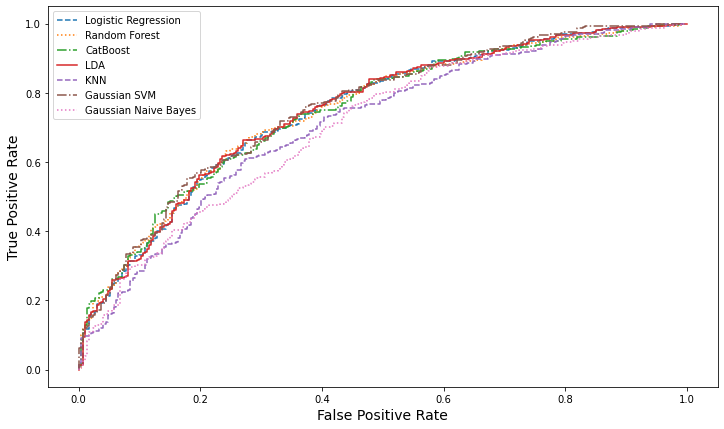

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB



# model_lr = LogisticRegression().fit(X_train, y_train)
probs_lr = tuned_lr.predict_proba(X_test)[:, 1]

#model_rf = RandomForestClassifier().fit(X_train, y_train)
probs_rf = tuned_rf.predict_proba(X_test)[:, 1]


#model_cat = CatBoostClassifier().fit(X_train, y_train)
probs_cat = tuned_cat.predict_proba(X_test)[:, 1]


#model_lda = LinearDiscriminantAnalysis().fit(X_train, y_train)
probs_lda = tuned_lda.predict_proba(X_test)[:, 1]

#model_knn = KNeighborsClassifier().fit(X_train, y_train)
probs_knn = tuned_knn.predict_proba(X_test)[:, 1]

#model_nb = GaussianNB().fit(X_train, y_train)
probs_nb = tuned_nb.predict_proba(X_test)[:, 1]



from sklearn.metrics import roc_auc_score, roc_curve

y_test_int = y_test.replace({'Good': 1, 'Bad': 0})
auc_lr = roc_auc_score(y_test_int, probs_lr)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test_int, probs_lr)

auc_rf = roc_auc_score(y_test_int, probs_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_int, probs_rf)

auc_cat = roc_auc_score(y_test_int, probs_cat)
fpr_cat, tpr_cat, thresholds_cat = roc_curve(y_test_int, probs_cat)

auc_lda = roc_auc_score(y_test_int, probs_lda)
fpr_lda, tpr_lda, thresholds_lda = roc_curve(y_test_int, probs_lda)

auc_knn = roc_auc_score(y_test_int, probs_knn)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test_int, probs_knn)

auc_nb = roc_auc_score(y_test_int, probs_nb)
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test_int, probs_nb)



import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

tpr = []
fpr = []
roc_auc = []
y_score = tuned_gsvm.fit(X_train, Y_train).decision_function(X_test)
fpr,tpr,_ = roc_curve(Y_test, y_score)
auc_svc = auc(fpr,tpr)



plt.figure(figsize=(12, 7))
plt.plot(fpr_lr, tpr_lr, linestyle='--', label=f'Logistic Regression')
#plt.plot(fpr_dt, tpr_dt, label=f'AUC (Decision Tree) = {auc_dt:.2f}')
plt.plot(fpr_rf, tpr_rf, linestyle=':',label=f'Random Forest')
#plt.plot(fpr_xg, tpr_xg, label=f'AUC (XGBoost) = {auc_xg:.2f}')
plt.plot(fpr_cat, tpr_cat, linestyle='-.',label=f'CatBoost')
#plt.plot(fpr_cat, tpr_cat, label=f'AUC (AdaBoost) = {auc_ada:.2f}')
plt.plot(fpr_lda, tpr_lda, linestyle='-',label=f'LDA')
plt.plot(fpr_knn, tpr_knn,linestyle='dashed', label=f'KNN')
plt.plot(fpr, tpr,linestyle='dashdot', label=f'Gaussian SVM')
plt.plot(fpr_nb, tpr_nb, linestyle='dotted',label=f'Gaussian Naive Bayes')

#plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

## 13. Decision Boundary

#### 13-1. Catboost

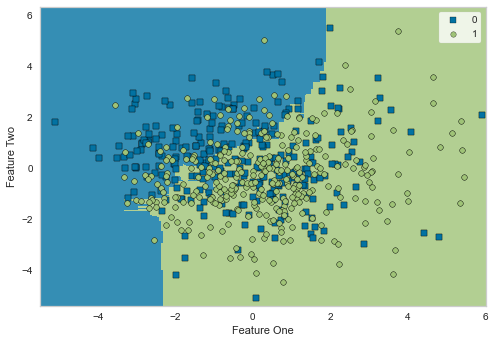

In [46]:
plot_model(tuned_cat, plot='boundary')

#### 13-2. Random Forest

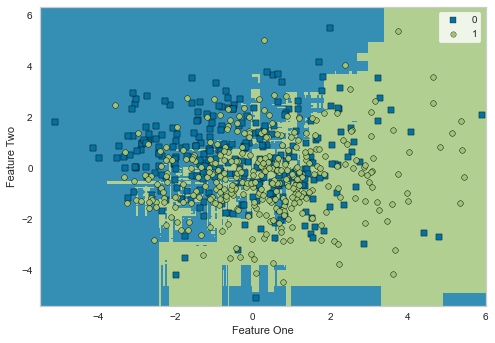

In [47]:
plot_model(tuned_rf, plot='boundary')

#### 13-3. Logistic Regression

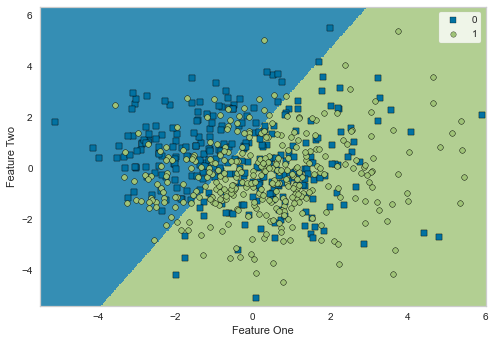

In [48]:
plot_model(tuned_lr, plot='boundary')

#### 13.4 LDA

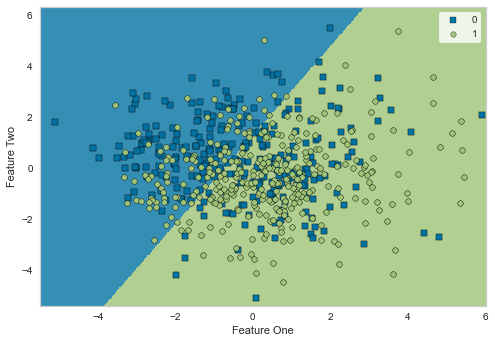

In [49]:
plot_model(tuned_lda, plot='boundary')

#### 13-5. Gaussian Naive Bayes

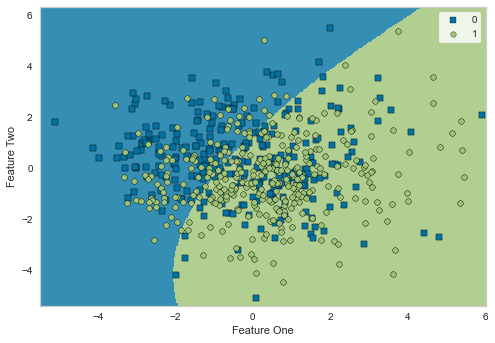

In [50]:
plot_model(tuned_nb, plot='boundary')

#### 13-6. K Nearest Neighbor

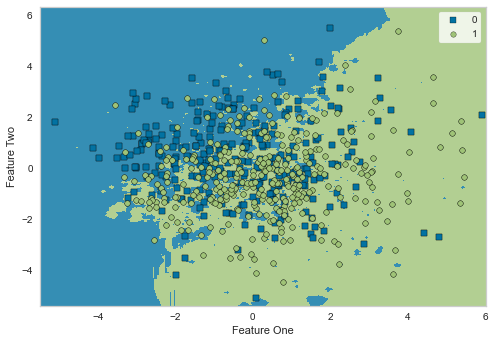

In [51]:
plot_model(tuned_knn, plot='boundary')

#### 13-7.  Gaussian Support Vector Machine

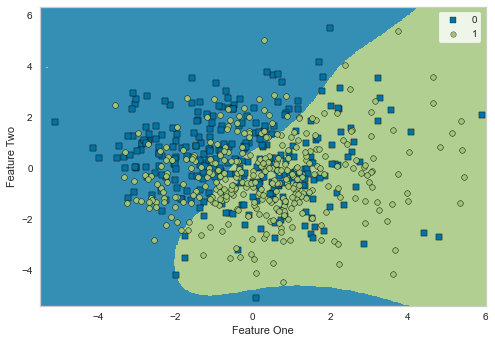

In [52]:
plot_model(tuned_gsvm, plot='boundary')

## 14. Feature Importance Plot / Coefficient Plot

#### 14.1 - Catboost (Feature Importance)

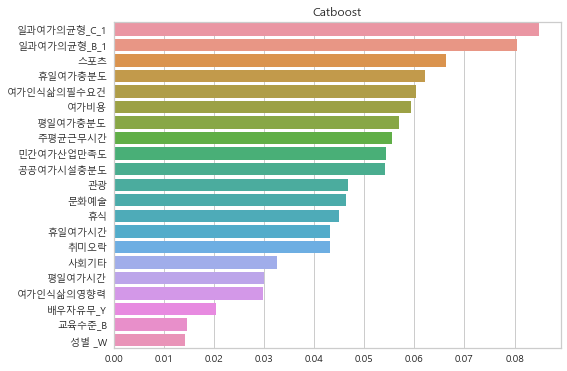

In [53]:
ft_importance_values = tuned_cat.feature_importances_
plt.rcParams['font.family'] = 'Malgun Gothic'
ft_series = pd.Series(ft_importance_values/100, index = X_train.columns)
ft_top30 = ft_series.sort_values(ascending=False)[:30]

plt.figure(figsize=(8,6))
sns.barplot(x=ft_top30, y=ft_top30.index)
plt.title('Catboost')
plt.show()
plt.rcParams['font.family'] = 'Malgun Gothic'

#### 14-2. Random Forest (Feature Importance)

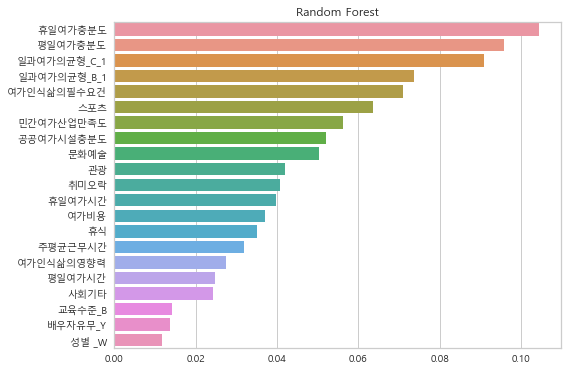

In [54]:
ft_importance_values = tuned_rf.feature_importances_
plt.rcParams['font.family'] = 'Malgun Gothic'
ft_series = pd.Series(ft_importance_values, index = X_train.columns)
ft_top30 = ft_series.sort_values(ascending=False)[:30]

plt.figure(figsize=(8,6))
sns.barplot(x=ft_top30, y=ft_top30.index)
plt.title('Random Forest')
plt.show()
plt.rcParams['font.family'] = 'Malgun Gothic'

#### 14-3. Logistic Regression (Coefficient Plot)

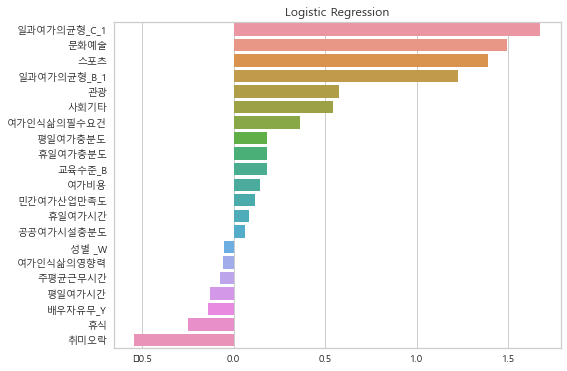

In [55]:
plt.rcParams['font.family'] = 'Malgun Gothic'
ft_series = pd.Series(tuned_lr.coef_[0,:], index = X_train.columns)
ft_top30 = ft_series.sort_values(ascending=False)[:30]

plt.figure(figsize=(8,6))
sns.barplot(x=ft_top30, y=ft_top30.index)
plt.title('Logistic Regression')
plt.show()
plt.rcParams['font.family'] = 'Malgun Gothic'